<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/SVM_pythonDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exemplo de SVM
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

Vamos desenvolver a intuição por trás das SVMs e usá-las como uma forma de classificar dados.

Começamos com os imports:

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set(style="ticks")

Em SVM, classificamos os dados de acordo com uma simples separação entre as classes de dados. Essa separação pode ser uma linha (em 1D), uma curva (em 2D) ou uma variedade (em múltiplas dimensões).

Vamos considerar um caso simples de classificação em que as duas classes de pontos são claramente separáveis:

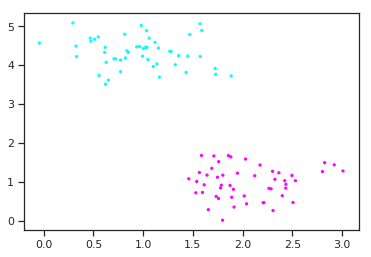

In [20]:
from sklearn.datasets.samples_generator import make_blobs
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, y = make_blobs(n_samples=100, n_features=2, centers=2,
                  random_state=0, cluster_std=0.40)
#print(X, X[:,0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='cool');

Com um classificador linear, devemos escolher a melhor reta para separar as duas classes da figura acima. Porém, temos várias possibilidades!

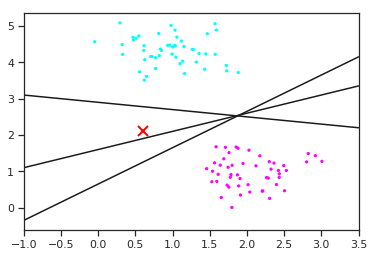

In [21]:
xfit = np.linspace(-1, 3.5)                         
plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='cool')
# colocar um marcador no plot:
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

# Escolhemos 3 possíveis valores de coef angular e linear para as retas classificadoras que queremos traçar:
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

As três retas acima são todas boas **separadoras**, porém, dependendo da escolha do separador, um novo ponto 'X' terá atribuído ***labels*** diferentes.

### Support Vector Machine

A ideia da SVM é que ao invés de escolhermos uma simples reta, podemos escolher uma ***margem*** em volta da reta, que determina uma faixa entre os pontos mais próximos. 

Vamos ver nossas possíveis escolhas:

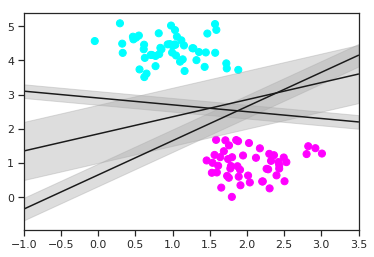

In [22]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.85, 0.85), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

**SVM**: determina a linha que **maximiza a margem**.

## Ajustando uma Support Vector Machine
Usaremos uma implementação de SVM do [***scikit-learn***](https://scikit-learn.org/stable/modules/svm.html#)

Vamos treinar e classificar a SVM nos dados que geramos aqui. Por enquanto, usaremos um **Kernel linear** e faremos ***C*** (**termo de regularização**) como sendo um número muito grande.  

In [23]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Vamos criar uma função para visualizar os **vetores e limites de decisão** da SVM:

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=60, linewidth=2, edgecolors='red')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Os pontos que tocam as linhas da margem definem os **support vectors**

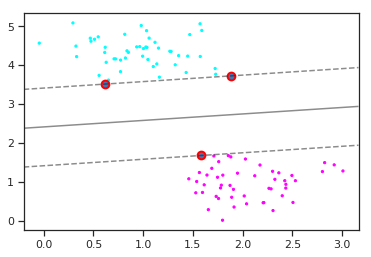

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='cool')
plot_svc_decision_function(model, plot_support=True)

In [26]:
model.support_vectors_

array([[0.62115578, 3.51146874],
       [1.88417193, 3.72204106],
       [1.58601816, 1.67511213]])

O sucesso da SVM está baseado no fato de que somente os support vectors contam para o ajuste. Todos os outros pontos de amotras têm os coeficientes $\alpha = 0$.

Podemos ver abaixo um exemplo disso, ao treinar a SVM com as primeiras 60 amostras geradas e com as primeiras 120 amostras geradas.

In [0]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=1000, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='cool')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)



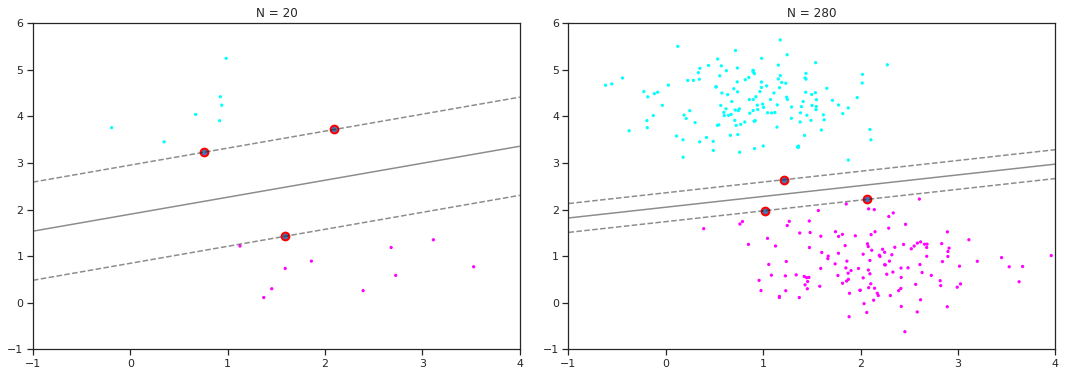

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [20, 280]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Além dos separadores lineares: A função Kernel da SVM

Quando não há uma separação linear possível, podemos aplicar uma função de transformação para um outro espaço de dimensão maior e conseguir então separar as amostras nesse outro espaço.

Vejamos um exemplo onde os dados não são linearmente separáveis:

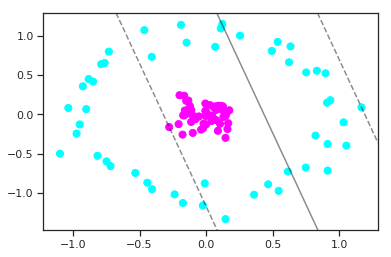

In [29]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1,random_state=0)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(clf, plot_support=False);

Vamos escolher a seguinte função:

In [0]:
r = np.exp(-(X ** 2).sum(1))

Vamos visualizar os dados com a dimensão adicional introduzida por $r$:

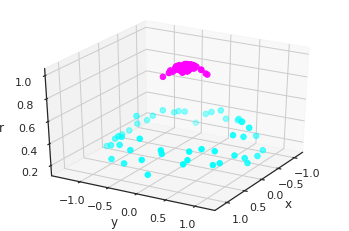

In [32]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=30, cmap='cool')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D();

Através da função de Kernel, não precisamos saber a transformção explicitamente, mas somente o produto escalar da transformação nos vetores de suporte.

Esse ***truque de Kernel*** está implementado na SVM do ***scikit-learn***:

In [33]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

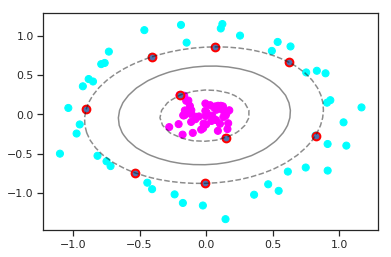

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Ajustando a SVM: suavizando as margens

Os exemplos que vimos até aqui foram de dados muito bem separados. Porém, podemos ter casos em que isso não acontede:

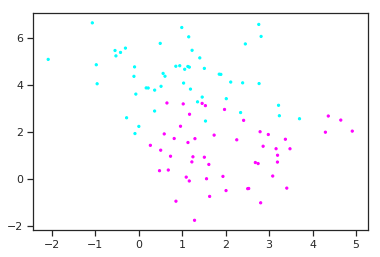

In [35]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='cool');

A suavização da margem é feita ajustando o parâmetro $C$.

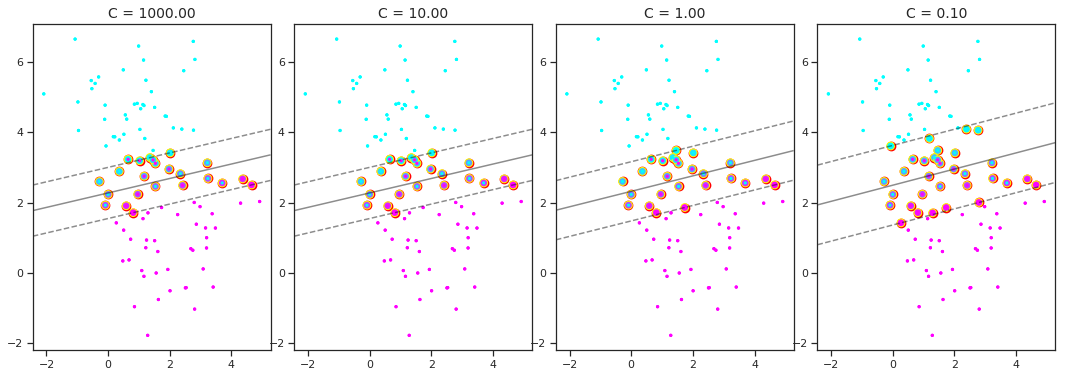

In [36]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 4, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [1000., 10.0, 1., 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='cool')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],c=model.decision_function(model.support_vectors_),cmap="cool",
                edgecolors="yellow",
                s=60, lw=1);
    axi.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='cool')
    axi.set_title('C = {0:.2f}'.format(C), size=14)

In [39]:
#fake rate A
# Para o ultimo treinamento com C=0.1
a =  model.predict(X)
nFP = 0
nFN = 0
for i,t,x in zip(a,y,X):
  if i!=t:
    print("wrong!",i,t,x)
    if t:
      nFN+=1
    else:
      nFP+=1
      
print("Falsos 'Negativos' \( rosa mas o SVC classifica azul\): {0:4d} ".format(nFN))
print("Falsos 'Positivos' \( azul mas o SVC classifica rosa\): {0:4d} ".format(nFP))
print("Ineficiência nFN/nTP {0:2.3f}".format(nFN/50) ) # pontos rosa perdidos
print("Fake-rate nFP/nTP {0:2.3f}".format(nFP/50))     # pontos azuis contaminando or rosas


wrong! 1 0 [-0.08907282  1.92683157]
wrong! 1 0 [1.53506501 2.4602949 ]
wrong! 0 1 [1.53308326 3.11678013]
wrong! 0 1 [1.9733776  2.95367493]
wrong! 1 0 [2.3435509  2.82199634]
wrong! 0 1 [0.64751944 3.23000908]
wrong! 1 0 [3.69997563 2.55854852]
wrong! 1 0 [3.23605092 2.68647645]
wrong! 0 1 [1.45762858 3.21310212]
wrong! 1 0 [3.21733967 3.13105387]
wrong! 1 0 [4.94540093e-04 2.23224820e+00]
wrong! 0 1 [1.0217967 3.1897416]
Falsos 'Negativos' \( rosa mas o SVC classifica azul\):    5 
Falsos 'Positivos' \( azul mas o SVC classifica rosa\):    7 
Ineficiência nFN/nTP 0.100
Fake-rate nFP/nTP 0.140


O melhor valor do parâmetro $C$ vai depender do conjunto de dados.

### Exercícios:

1.   Construa um algoritmo de SVM linear "à mão";
2. Use o classificador de SVM para fazer reconhecimento facial;
3. Use o classificador de SVM para recnhecimento de números escritos à mão.


### Referências:



1. Exemplos:
* https://scikit-learn.org/stable/modules/svm.html

2. Classificação de números:
> https://github.com/ksopyla/svm_mnist_digit_classification

3. Vídeos:
   * MIT Public Lecture: https://www.youtube.com/watch?v=_PwhiWxHK8o



